In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/nasa.csv")
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
data.shape


(4687, 40)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

Dropping irrelevant columns which dont contribute for classifying asteroids.

In [ ]:
data=data.drop(['Neo Reference ID','Name','Orbit ID','Close Approach Date','Epoch Date Close Approach','Orbit Determination Date'],axis=1)
data.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


One Hot encoding


In [ ]:
hazardous_labels = pd.get_dummies(data['Hazardous']).astype(int)
hazardous_labels

,False,True
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
4682,1,0
4683,1,0
4684,1,0
4685,1,0


In [ ]:
data=pd.concat([data,hazardous_labels],axis=1)
data.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,False,True
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True,0,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False,1,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True,0,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False,1,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True,0,1


In [ ]:
data=data.drop(['Hazardous'],axis=1)
data.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,False,True
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,0,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,1,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,0,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,1,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Est Dia in Miles(min)         4687 non-null   float64
 6   Est Dia in Miles(max)         4687 non-null   float64
 7   Est Dia in Feet(min)          4687 non-null   float64
 8   Est Dia in Feet(max)          4687 non-null   float64
 9   Relative Velocity km per sec  4687 non-null   float64
 10  Relative Velocity km per hr   4687 non-null   float64
 11  Miles per hour                4687 non-null   float64
 12  Miss Dist.(Astronomical)      4687 non-null   float64
 13  Mis

In [ ]:
data['Orbiting Body'].value_counts()

,count
Orbiting Body,
Earth,4687


In [ ]:
data['Equinox'].value_counts()

,count
Equinox,
J2000,4687


As unique value is there so drop them


In [ ]:
data=data.drop(['Orbiting Body','Equinox'],axis=1)
data.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,False,True
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,0,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,1,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,0,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,1,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,0,1


<Axes: >

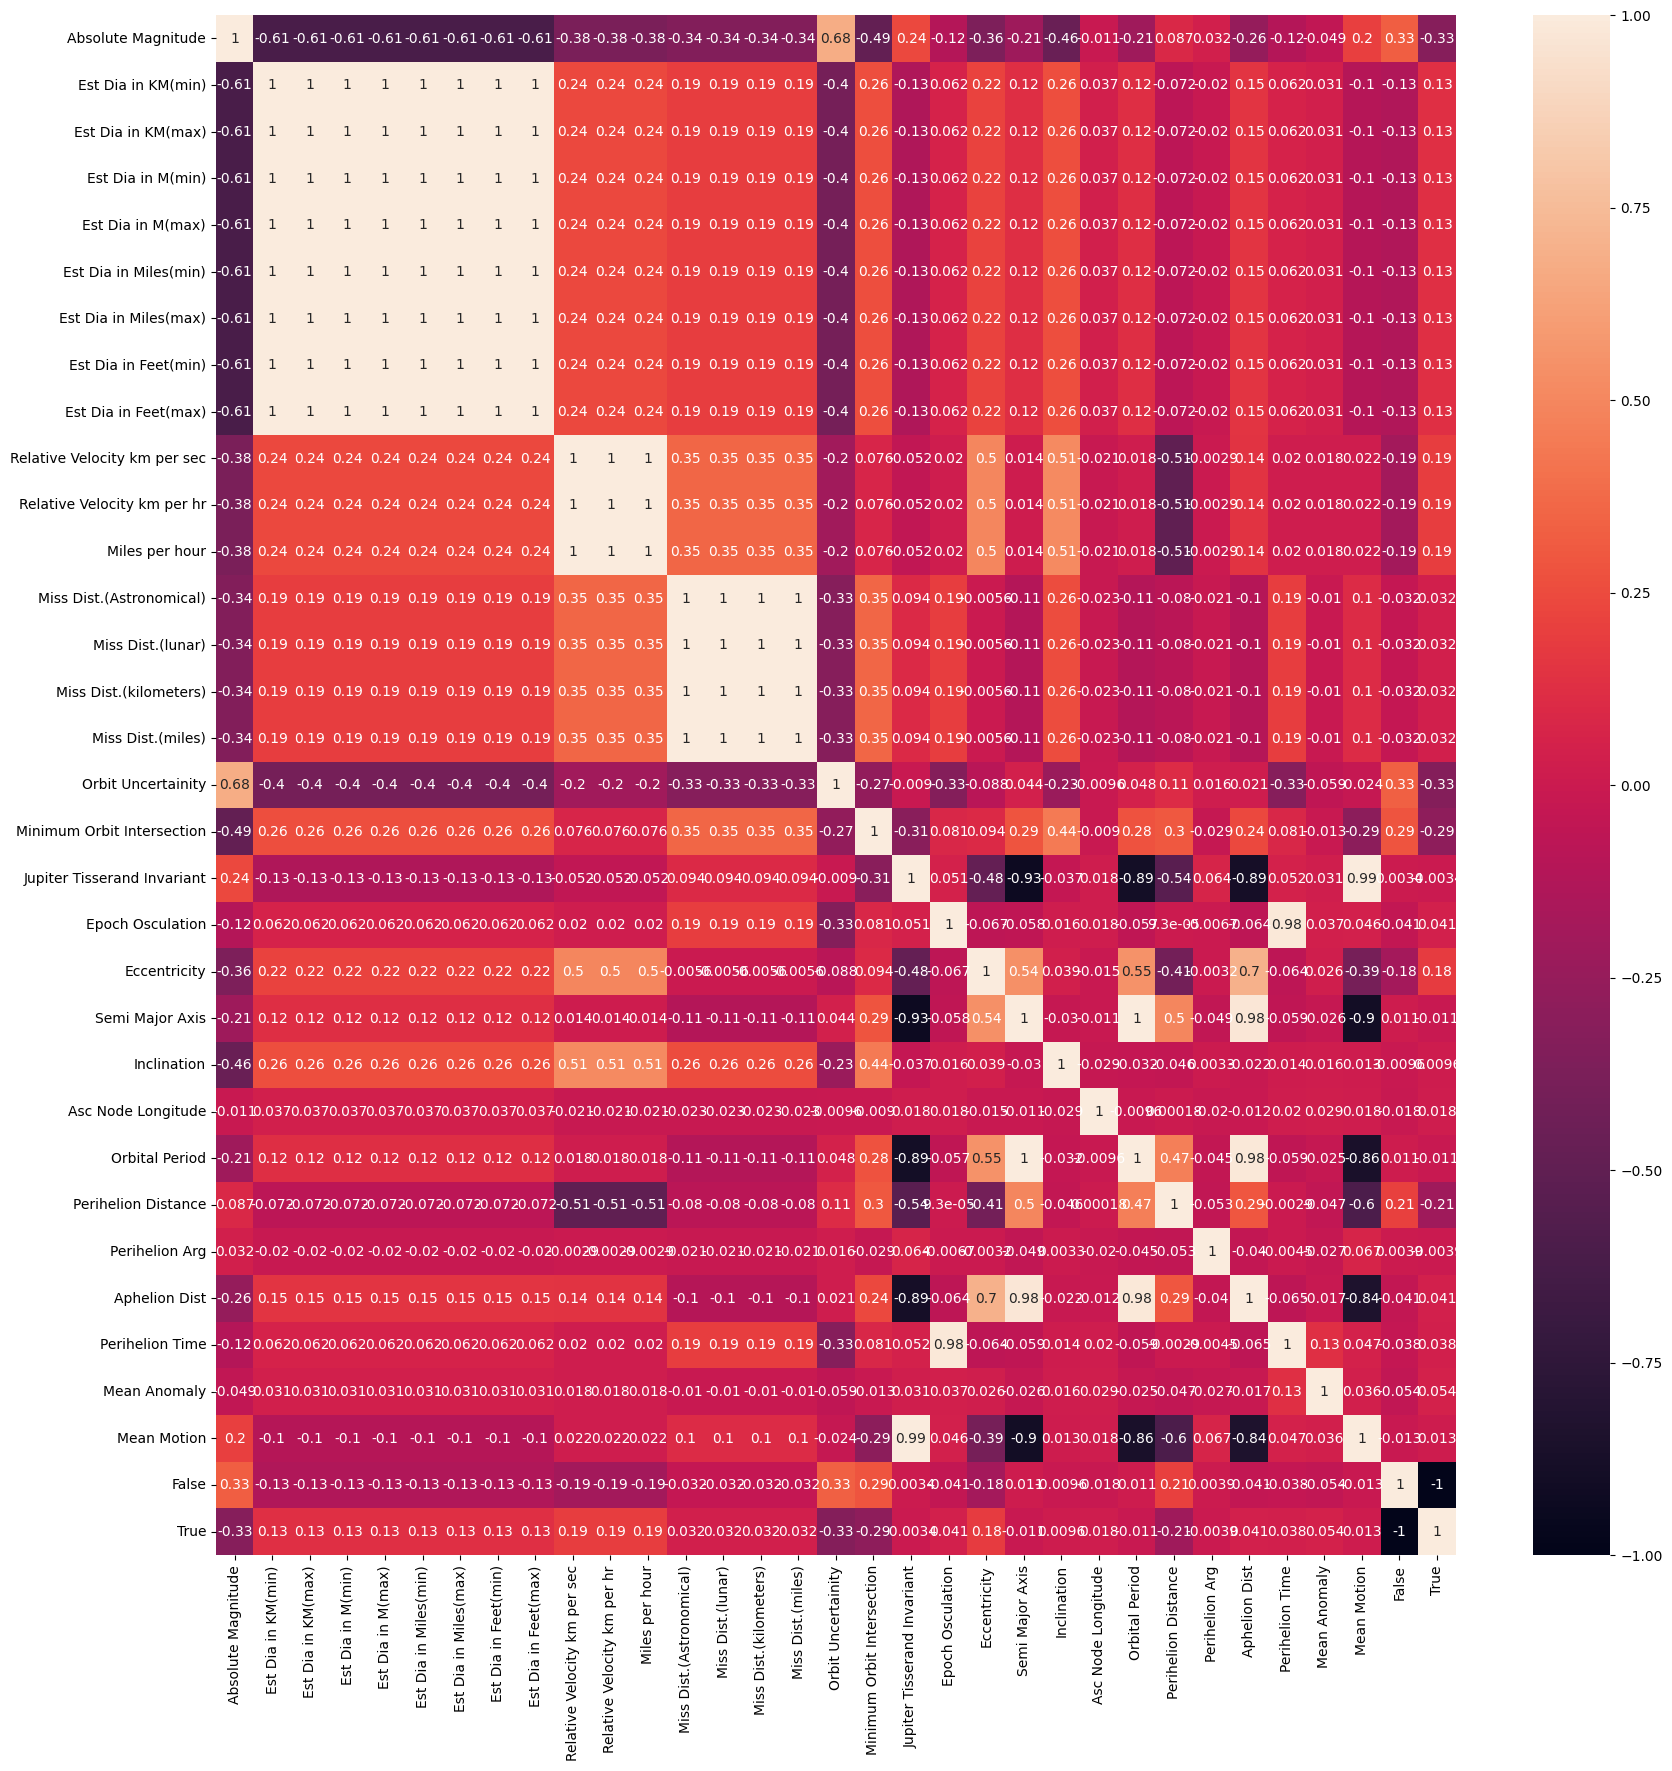

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data = data.drop(['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)'
             ,'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
             'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(lunar)',
             'Miss Dist.(kilometers)', 'Miss Dist.(miles)'], axis = 1)
data.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,False,True
0,21.6,0.127220,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,0,1
1,21.3,0.146068,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,1,0
2,20.3,0.231502,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,0,1
3,27.4,0.008801,11.173874,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,1,0
4,21.6,0.127220,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,0,1


<Axes: >

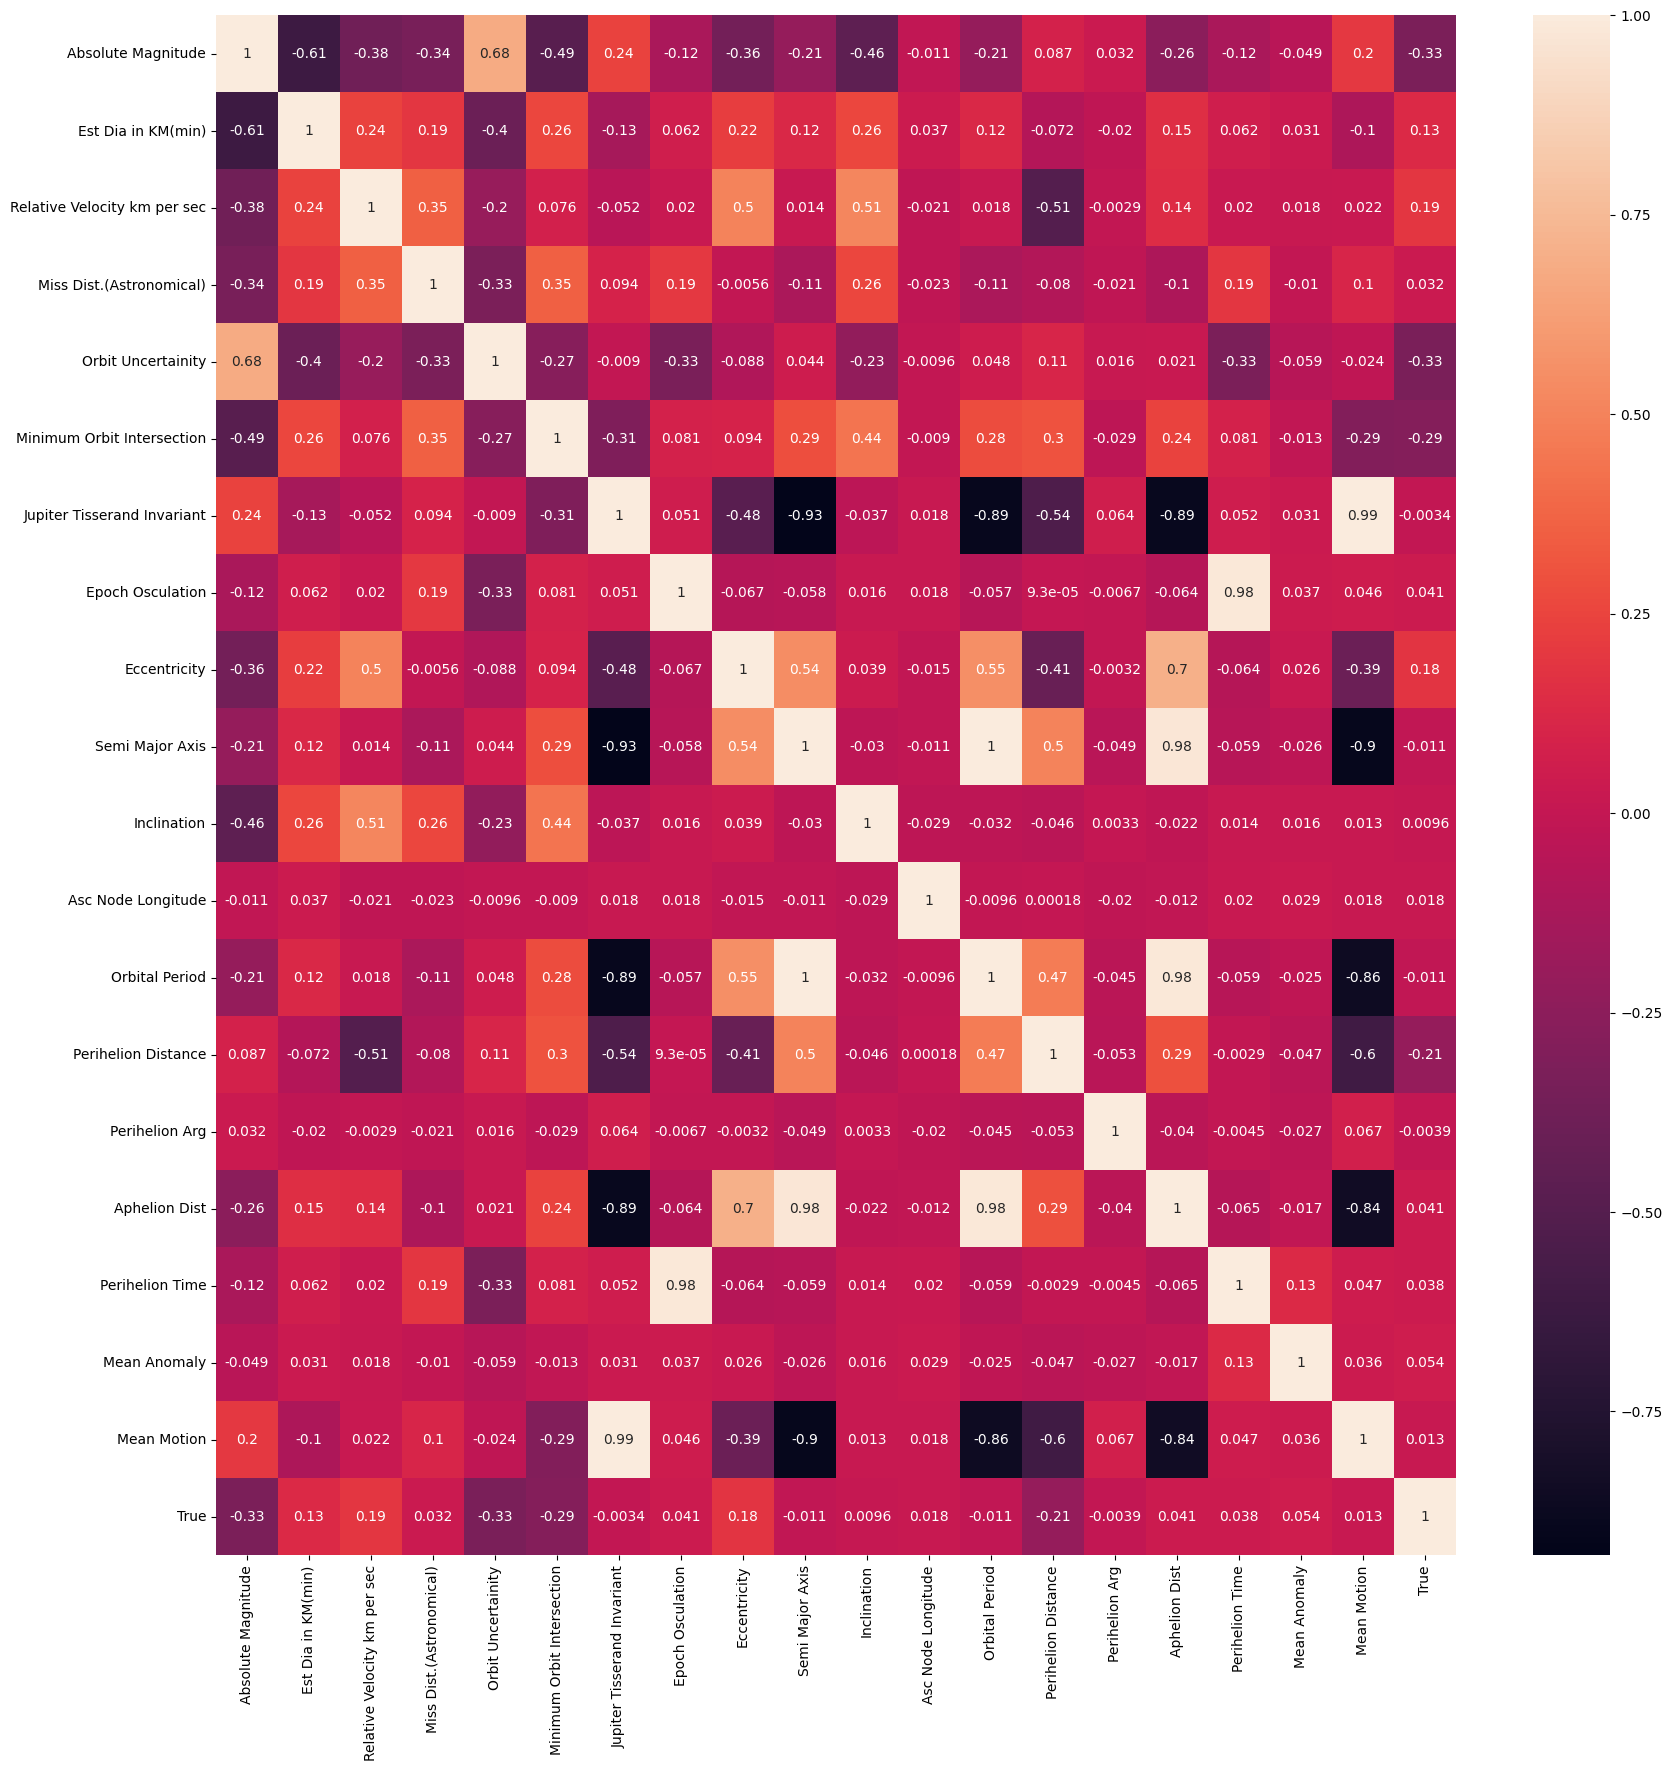

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data=data.drop([False],axis=1)
data.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,True
0,21.6,0.127220,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,11.173874,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [ ]:
data.describe()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,True
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,22.267865,0.204604,13.970811,0.256778,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
std,2.890972,0.369573,7.293223,0.145798,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647
min,11.160000,0.001011,0.335504,0.000178,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,20.100000,0.033462,8.432865,0.133420,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,21.900000,0.110804,12.917889,0.265029,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,24.500000,0.253837,18.077649,0.384154,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,32.100000,15.579552,44.633747,0.499884,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


In [ ]:
x=data.drop([True],axis=1)
y=data[True]
y.head()

,True
0,1
1,0
2,1
3,0
4,1


XGBooster Classifier


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9936034115138592


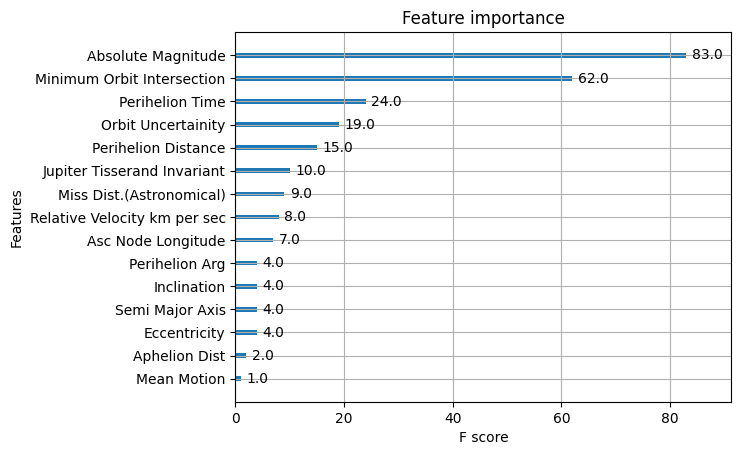

In [ ]:
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance

xbg_model=XGBClassifier()
xbg_model.fit(x_train,y_train)
plot_importance(xbg_model)
pyplot.show()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=xbg_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.994314143567875


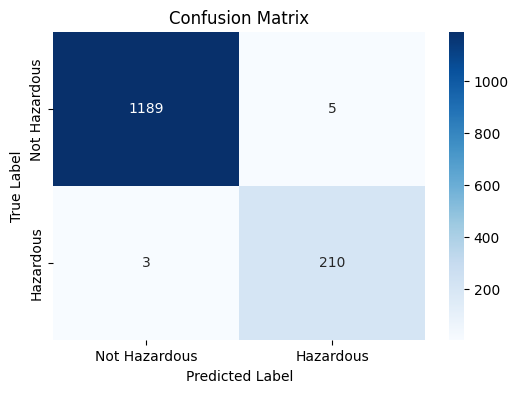

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       0.98      0.99      0.98       213

    accuracy                           0.99      1407
   macro avg       0.99      0.99      0.99      1407
weighted avg       0.99      0.99      0.99      1407

Model Accuracy: 0.9943


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Hazardous', 'Hazardous'],
            yticklabels=['Not Hazardous', 'Hazardous'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

do evaluation metrics


In [ ]:
import numpy as np

### Step 1: Predict Hazardous Status ###
random_index_hazardous = np.random.randint(0, x_test.shape[0])  # Select random test input
print(f"Selected Index for Hazardous Prediction: {random_index_hazardous}")

# Ensure correct indexing for Pandas DataFrame
random_example_hazardous = x_test.iloc[random_index_hazardous] if isinstance(x_test, pd.DataFrame) else x_test[random_index_hazardous]

# Sklearn model prediction for hazardous status
sklearn_hazardous_prediction = xbg_model.predict([random_example_hazardous])[0]
  # 0 or 1
print(f"Sklearn Hazardous Prediction: {sklearn_hazardous_prediction}")


Selected Index for Hazardous Prediction: 357
Sklearn Hazardous Prediction: 0


In [ ]:
import numpy as np

# Sigmoid function for manual prediction
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to classify damage level based on model outputs
def classify_damage(is_hazardous, diameter):
    if is_hazardous == 0 and diameter < 50:
        return "Low"
    elif is_hazardous == 0 and diameter >= 50:
        return "Medium"
    elif is_hazardous == 1 and diameter < 300:
        return "High"
    else:
        return "Extreme"

### Step 1: Predict Hazardous Status (Static Example) ###
random_example_hazardous = np.array([0.8, 1.2, -0.5, 0.6])  # Example test input (Replace with real feature values)

# Simulated weights & bias for hazardous model (Replace with trained values)
w_out_hazardous = np.array([0.4, -0.3, 0.7, -0.2])
b_out_hazardous = 0.1

# Sklearn model prediction (Simulated Output: Assume it predicts 1)
sklearn_hazardous_prediction = 1  # 1 = Hazardous, 0 = Not Hazardous

# Manual model prediction for hazardous status
z_wb_hazardous = np.dot(w_out_hazardous, random_example_hazardous) + b_out_hazardous
f_wb_hazardous = sigmoid(z_wb_hazardous)
my_hazardous_prediction = int(f_wb_hazardous >= 0.5)  # 1 if hazardous, 0 if not

### Step 2: Predict Diameter (Static Example) ###
random_example_diameter = np.array([0.5, -0.1, 1.0])  # Example test input (Replace with real feature values)

# Simulated weights & bias for diameter model (Replace with trained values)
w_out_diameter = np.array([1.2, -0.8, 2.1])
b_out_diameter = -0.3

# Predicted diameter using sklearn model (Simulated Output)
predicted_diameter = 150.0  # Assume the model predicts 150 meters

### Step 3: Determine Damage Level ###
damage_level = classify_damage(my_hazardous_prediction, predicted_diameter)

### Print Results ###
print(f"Testing Example for Hazardous Status:")
print(f"  SkLearn Hazardous Prediction: {'Hazardous' if sklearn_hazardous_prediction == 1 else 'Not Hazardous'}")
print(f"  My Model Hazardous Prediction: {'Hazardous' if my_hazardous_prediction == 1 else 'Hazardous'}")

print(f"\nTesting Example for Diameter:")
print(f"  Predicted Diameter: {predicted_diameter:.2f} meters")

print(f"\nFinal Prediction:")
print(f"  Predicted Damage Level: {damage_level}")


Testing Example for Hazardous Status:
  SkLearn Hazardous Prediction: Hazardous
  My Model Hazardous Prediction: Hazardous

Testing Example for Diameter:
  Predicted Diameter: 150.00 meters

Final Prediction:
  Predicted Damage Level: Medium


In [ ]:
from tabulate import tabulate

# Define model performance data
data = {
    "Model": ["BaseLine Model", "Ridge Regression", "K-Nearest Neighbors", "Random Forest"],
    "Mean Squared Error (Train)": [82.1814, 1.27570, 5.72616, 0.711455],
    "R² Score (Train)": [0.0, 0.6, 0.93032, 0.9913428],
    "Mean Squared Error (Test)": [100.0905, 1.625752, 11.38948, 5.010455],  # Replace "Not provided" with NaN
    "R² Score (Test)": [-7.4058, 0.9837510, 0.88620, 0.949940]  # Replace "Not provided" with NaN
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print table with better formatting
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════╤═════════════════════╤══════════════════════════════╤════════════════════╤═════════════════════════════╤═══════════════════╕
│    │ Model               │   Mean Squared Error (Train) │   R² Score (Train) │   Mean Squared Error (Test) │   R² Score (Test) │
╞════╪═════════════════════╪══════════════════════════════╪════════════════════╪═════════════════════════════╪═══════════════════╡
│  0 │ BaseLine Model      │                    82.1814   │           0        │                   100.091   │         -7.4058   │
├────┼─────────────────────┼──────────────────────────────┼────────────────────┼─────────────────────────────┼───────────────────┤
│  1 │ Ridge Regression    │                     1.2757   │           0.6      │                     1.62575 │          0.983751 │
├────┼─────────────────────┼──────────────────────────────┼────────────────────┼─────────────────────────────┼───────────────────┤
│  2 │ K-Nearest Neighbors │                     5.72616  │           0.93032  │   

In [ ]:
import pandas as pd
from tabulate import tabulate

# Define model accuracy data
data = {
    "Model": ["XGBoost", "SVM", "Decision Tree Classifier", "Logistic Regression"],
    "Accuracy (%)": [99.43, 95.31, 99.36, 95.20]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print table with better formatting
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))


╒════╤══════════════════════════╤════════════════╕
│    │ Model                    │   Accuracy (%) │
╞════╪══════════════════════════╪════════════════╡
│  0 │ XGBoost                  │          99.43 │
├────┼──────────────────────────┼────────────────┤
│  1 │ SVM                      │          95.31 │
├────┼──────────────────────────┼────────────────┤
│  2 │ Decision Tree Classifier │          99.36 │
├────┼──────────────────────────┼────────────────┤
│  3 │ Logistic Regression      │          95.2  │
╘════╧══════════════════════════╧════════════════╛
